<a href="https://colab.research.google.com/github/sanvasu/Loan-Default-Analysis/blob/main/Loan_Default_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
import warnings
warnings.filterwarnings('ignore')

##Data Reading

In [60]:
df = pd.read_csv('loan.csv')

In [61]:
df.head()

,ID,year,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,type1,p1,nob/c,116500,NaN,NaN,118000.0,pr,1740.0,EXP,758,CIB,25-34,98.728814,south,1
1,24891,2019,cf,Male,type2,p1,b/c,206500,NaN,NaN,NaN,pr,4980.0,EQUI,552,EXP,55-64,NaN,North,1
2,24892,2019,cf,Male,type1,p1,nob/c,406500,4.56,595.0,508000.0,pr,9480.0,EXP,834,CIB,35-44,80.019685,south,0
3,24893,2019,cf,Male,type1,p4,nob/c,456500,4.25,NaN,658000.0,pr,11880.0,EXP,587,CIB,45-54,69.376900,North,0
4,24894,2019,cf,Joint,type1,p1,nob/c,696500,4.00,0.0,758000.0,pr,10440.0,CRIF,602,EXP,25-34,91.886544,North,0


##Exploratory Data Analysis

In [62]:
df.shape

(148670, 20)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        148670 non-null  int64  
 1   year                      148670 non-null  int64  
 2   loan_limit                145326 non-null  object 
 3   Gender                    148670 non-null  object 
 4   loan_type                 148670 non-null  object 
 5   loan_purpose              148536 non-null  object 
 6   business_or_commercial    148670 non-null  object 
 7   loan_amount               148670 non-null  int64  
 8   rate_of_interest          112231 non-null  float64
 9   Upfront_charges           109028 non-null  float64
 10  property_value            133572 non-null  float64
 11  occupancy_type            148670 non-null  object 
 12  income                    139520 non-null  float64
 13  credit_type               148670 non-null  o

In [64]:
df.nunique()

,0
ID,148670
year,1
loan_limit,2
Gender,4
loan_type,3
loan_purpose,4
business_or_commercial,2
loan_amount,211
rate_of_interest,131
Upfront_charges,58271


In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,148670.0,99224.500000,42917.476598,24890.000000,62057.25000,99224.50000,136391.750000,173559.00
year,148670.0,2019.000000,0.000000,2019.000000,2019.00000,2019.00000,2019.000000,2019.00
loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3576500.00
rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.00
Upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,60000.00
property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,16508000.00
income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,578580.00
Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,900.00
LTV,133572.0,72.746457,39.967603,0.967478,60.47486,75.13587,86.184211,7831.25
Status,148670.0,0.246445,0.430942,0.000000,0.00000,0.00000,0.000000,1.00


##Checking null values percentage

In [66]:
df.isnull().sum()*100/len(df)

,0
ID,0.000000
year,0.000000
loan_limit,2.249277
Gender,0.000000
loan_type,0.000000
loan_purpose,0.090133
business_or_commercial,0.000000
loan_amount,0.000000
rate_of_interest,24.509989
Upfront_charges,26.664425


##### From the above values we can see 26% of Upfront_Charges have null values and 24% in rate_of_interest column and 10% in LTV. Other columns have minor number of null values.

##Filling Null Values

In [67]:
df['loan_limit'] = df['loan_limit'].fillna('NA')

In [68]:
df['loan_purpose'] = df['loan_purpose'].fillna('NA')

In [69]:
df['age'] = df['age'].fillna('NA')

######Removing null values rows for age and loan_purpose column. it have very little number of rows with  null value so it will not make any impact

In [70]:
df = df[df['age'] != 'NA']
df = df[df['loan_purpose'] != 'NA']

###Helper function for replacing null with mode

In [71]:
def replace_na_with_mode(df, columns):
    for column in columns:
        if column in df.columns:
            mode_value = df[column].mode()[0]  # Get the first mode
            df[column] = df[column].fillna(mode_value)  # Replace NaNs with mode
            print(f"Replaced missing values in '{column}' with mode: {mode_value}")
        else:
            print(f"Column '{column}' does not exist in the DataFrame.")

    return df

In [72]:
df = replace_na_with_mode(df, ['property_value'])
df = replace_na_with_mode(df, ['rate_of_interest'])

Replaced missing values in 'property_value' with mode: 308000.0
Replaced missing values in 'rate_of_interest' with mode: 3.99


In [73]:
def replace_na_with_median(df, columns):
    for column in columns:
        if column in df.columns:
            median_value = df[column].median()  # Get the first median
            df[column] = df[column].fillna(median_value)  # Replace NaNs with mode
            print(f"Replaced missing values in '{column}' with mode: {median_value}")
        else:
            print(f"Column '{column}' does not exist in the DataFrame.")

    return df

###Calculating missing LTV value function

In [75]:
def calculate_and_fill_missing_ltv(df):
    # Calculate LTV where loan_amount and property_value are not NaN
    mask = df['loan_amount'].notna() & df['property_value'].notna()

    # Calculate LTV only for the valid rows
    df.loc[mask, 'LTV'] = (df.loc[mask, 'loan_amount'] / df.loc[mask, 'property_value']) * 100

    # Fill missing LTV values with the calculated values
    df['LTV'].fillna(df['LTV'], inplace=True)

    return df

In [76]:
df = calculate_and_fill_missing_ltv(df)

In [77]:
df.isnull().sum()*100/len(df)

,0
ID,0.0
year,0.0
loan_limit,0.0
Gender,0.0
loan_type,0.0
loan_purpose,0.0
business_or_commercial,0.0
loan_amount,0.0
rate_of_interest,0.0
Upfront_charges,0.0


###All the null values are handled

##Univariante Analysis for Categorical Columns

<Axes: xlabel='Gender'>

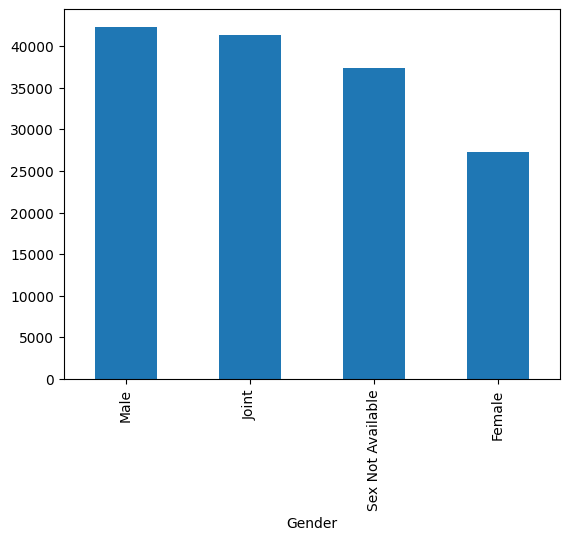

In [78]:
df['Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='loan_type'>

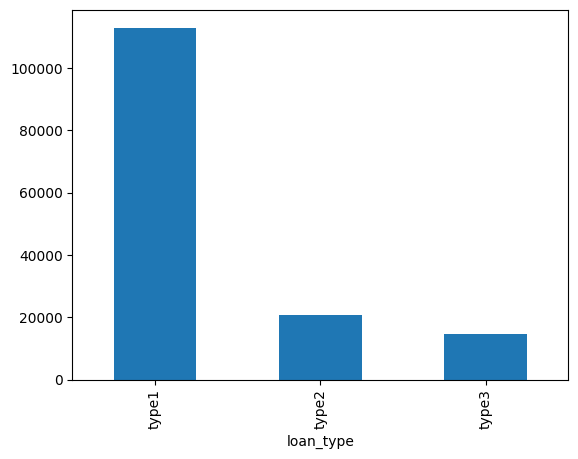

In [79]:
df['loan_type'].value_counts().plot(kind='bar')

<Axes: xlabel='loan_purpose'>

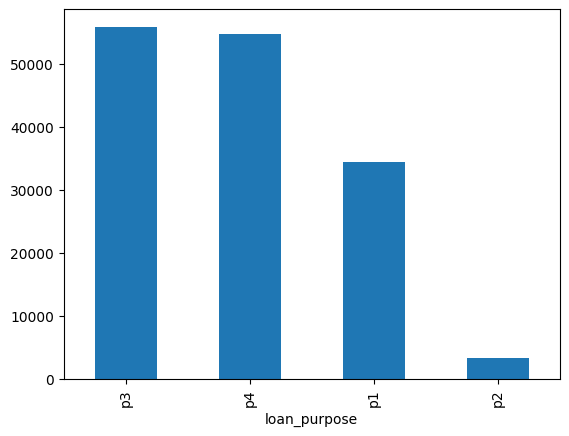

In [80]:
df['loan_purpose'].value_counts().plot(kind='bar')

<Axes: xlabel='business_or_commercial'>

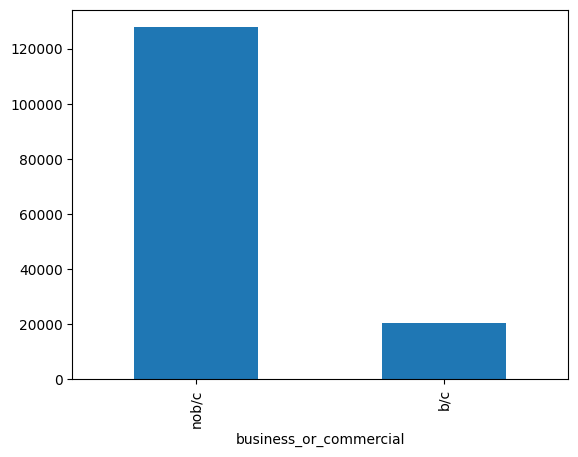

In [81]:
df['business_or_commercial'].value_counts().plot(kind='bar')

##Univariante analysis for numerical columns

<Axes: xlabel='age'>

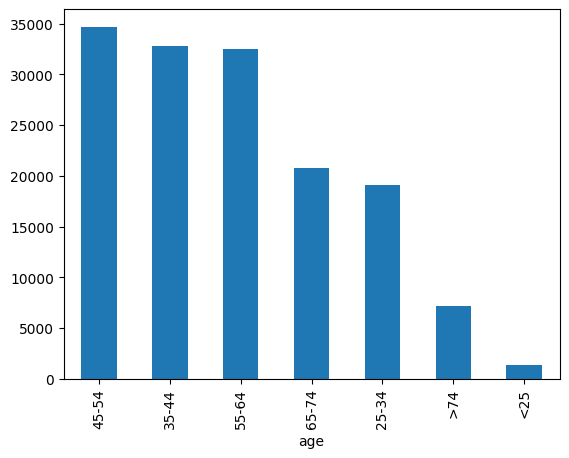

In [82]:
df['age'].value_counts().plot(kind='bar')

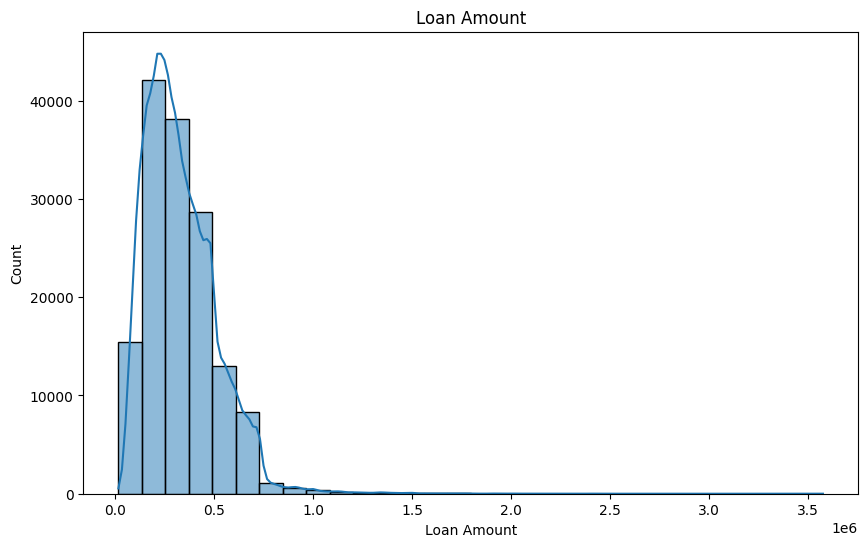

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='loan_amount', bins=30, kde=True)
plt.title('Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

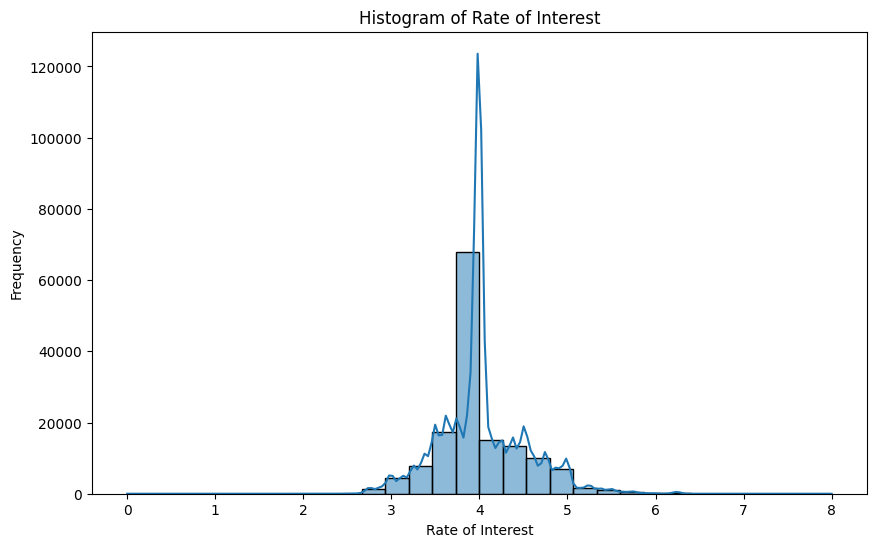

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rate_of_interest'], bins=30, kde=True)
plt.title('Histogram of Rate of Interest')
plt.xlabel('Rate of Interest')
plt.ylabel('Frequency')
plt.show()

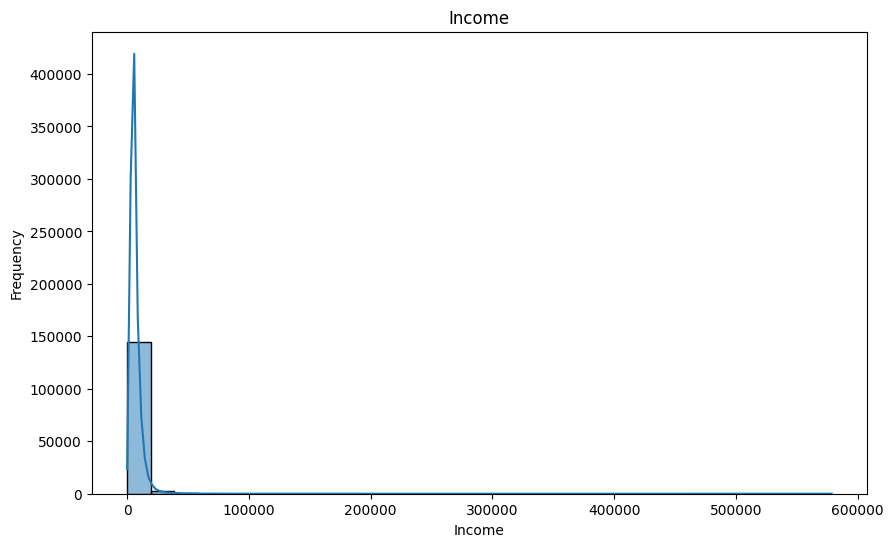

In [97]:
plt.figure(figsize=(10, 6))
sns.histplot(df['income'], bins=30, kde=True)
plt.title('Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

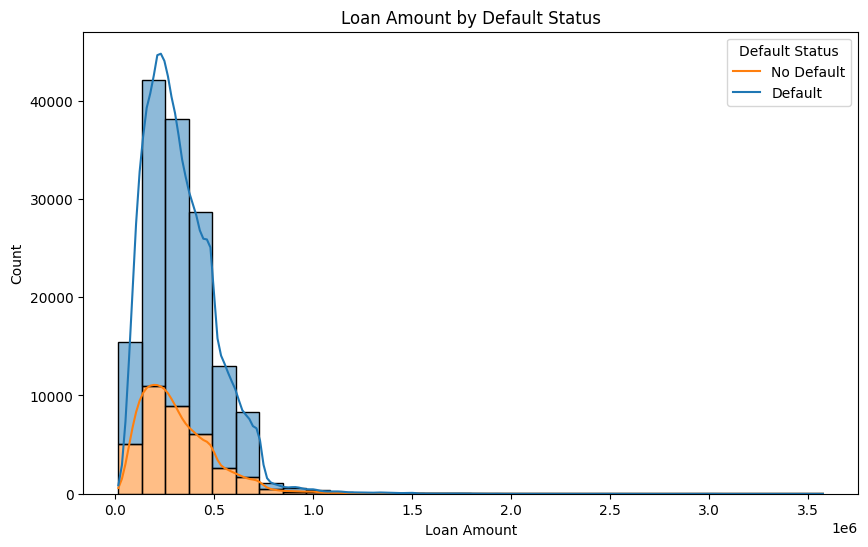

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='loan_amount', hue='Status', multiple='stack', bins=30, kde=True)
plt.title('Loan Amount by Default Status')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.legend(title='Default Status', labels=['No Default', 'Default'])
plt.show()

Here we observe that more number of default status have higher loan amount

##Checking for Imbalance for Data

In [88]:
df_normal = df.loc[df['Status']==0]
df_defaulter = df.loc[df['Status']==1]

##Analyzing data based on target variable

###For non-defaulters checking for outliers

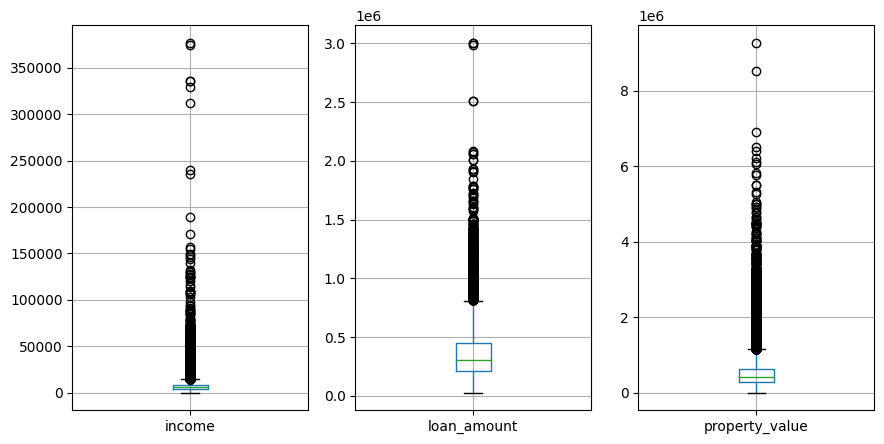

In [89]:
cols = df_normal[['income','loan_amount','property_value']]
plt.figure(figsize= (14,5))
plt.tight_layout()
for i , col in enumerate(cols):
    plt.subplot(1,4, i+1)
    df_normal.boxplot(column = col)
plt.show()

###For defaulters checking for outliers

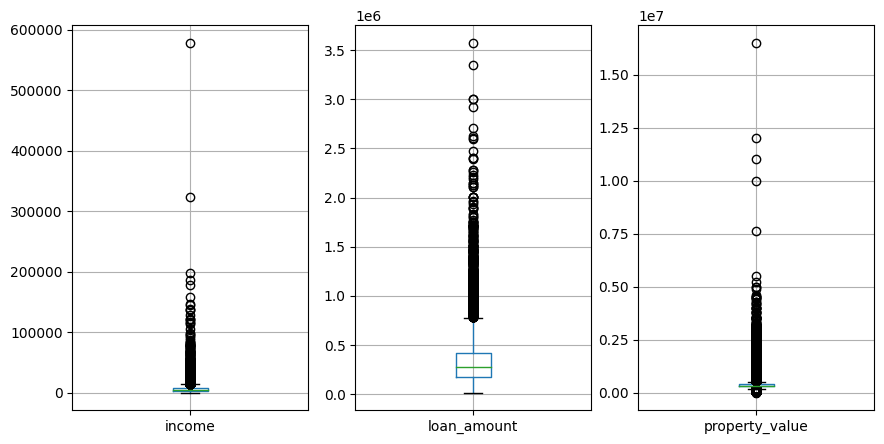

In [90]:
cols = df_defaulter[['income','loan_amount','property_value']]
plt.figure(figsize= (14,5))
plt.tight_layout()
for i , col in enumerate(cols):
    plt.subplot(1,4, i+1)
    df_defaulter.boxplot(column = col)
plt.show()

When analyzing the outliers for Defaulters and Non-Defaulters we can conclude that,

* The income distribution exhibits a significant range, with numerous outliers on
the upper end, indicating a few individuals with exceptionally high incomes compared to the majority.

* Similar to income, the loan amounts also show a considerable range with a presence of high-end outliers. Most loan amounts fall below the upper quartile, but extreme values suggest a few larger loans substantially impact the overall distribution.

* The property value distribution reflects a similar pattern, with significant high-end outliers. While most properties are valued within a certain range, a few highly valued properties contribute to an overall skewness in the data.

##Univariant analysis with target vairables

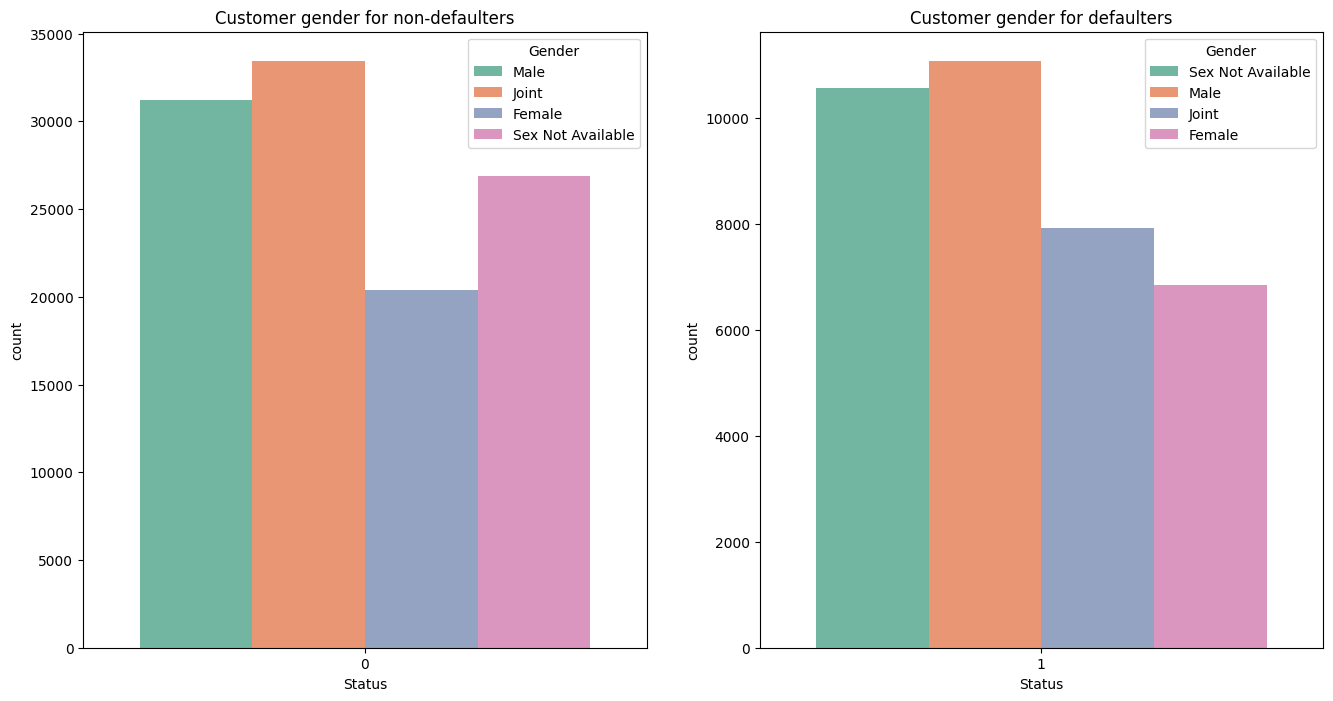

In [91]:
plt.figure(figsize= (16,8))
plt.subplot(1,2,1)
sns.countplot(x='Status',data = df_normal, hue='Gender', palette='Set2')
plt.title('Customer gender for non-defaulters')
plt.subplot(1,2,2)
sns.countplot(x='Status',data = df_defaulter, hue='Gender', palette='Set2')
plt.title('Customer gender for defaulters')
plt.show()

#### When comparing the gender with Defaulters and Non-Defaulters Male have high number of defaulter count.

In [107]:
df[(df['Gender'] == 'Female') & (df['Status'] == 1)].shape[0]

6843

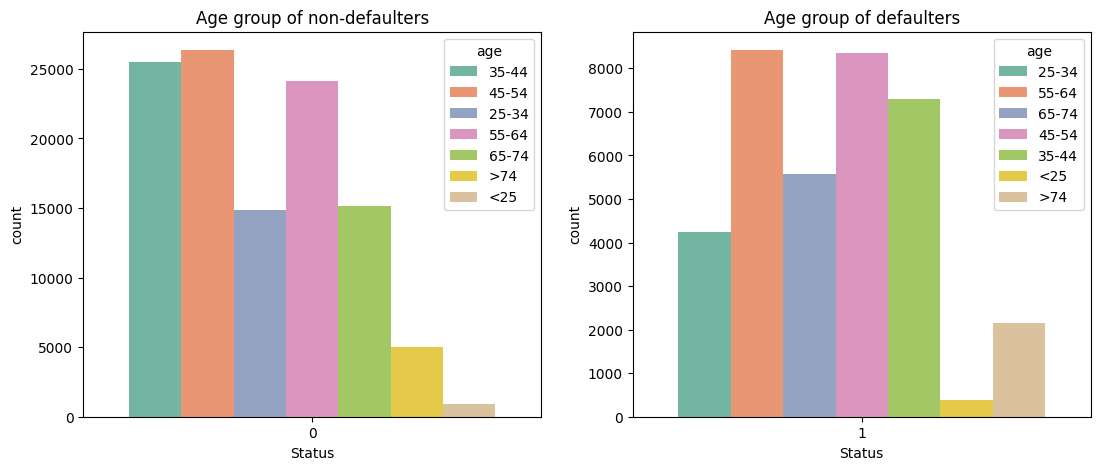

In [105]:
plt.figure(figsize= (13,5))
plt.subplot(1,2,1)
sns.countplot(x='Status',data = df_normal, hue='age', palette='Set2')
plt.title('Age group of non-defaulters')
plt.subplot(1,2,2)
sns.countplot(x='Status',data = df_defaulter, hue='age', palette='Set2')
plt.title('Age group of defaulters')
plt.show()

#### 45-54 age group are high in Non-Defaulters count and 55-64 age group are high in defaulters count.

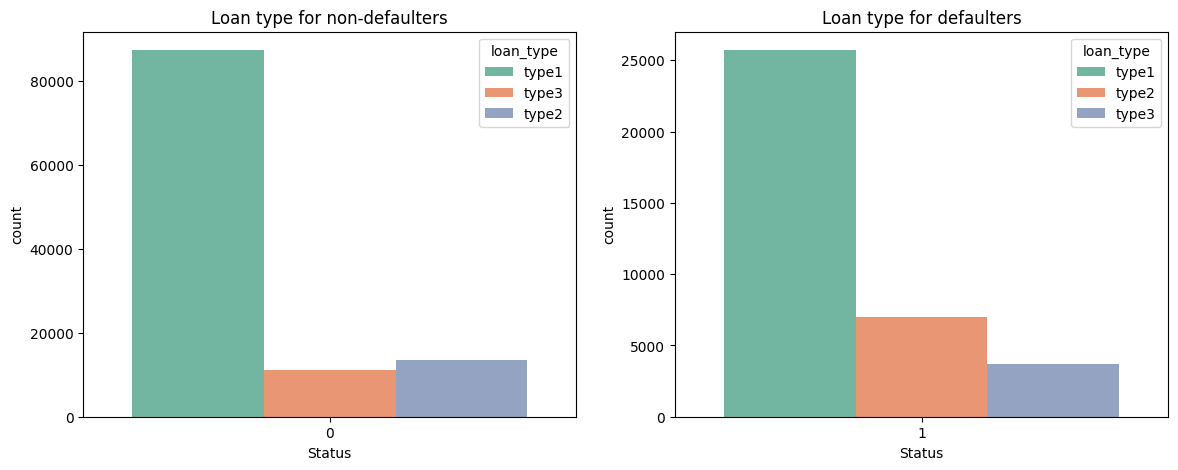

In [93]:
plt.figure(figsize= (14,5))
plt.subplot(1,2,1)
sns.countplot(x='Status',data = df_normal, hue='loan_type', palette='Set2')
plt.title('Loan type for non-defaulters')
plt.subplot(1,2,2)
sns.countplot(x='Status',data = df_defaulter, hue='loan_type', palette='Set2')
plt.title('Loan type for defaulters')
plt.show()

####In both default and non-default status, type1 loan are higher, and in default status type2 loan is slightly above compared to non-defaulter status.

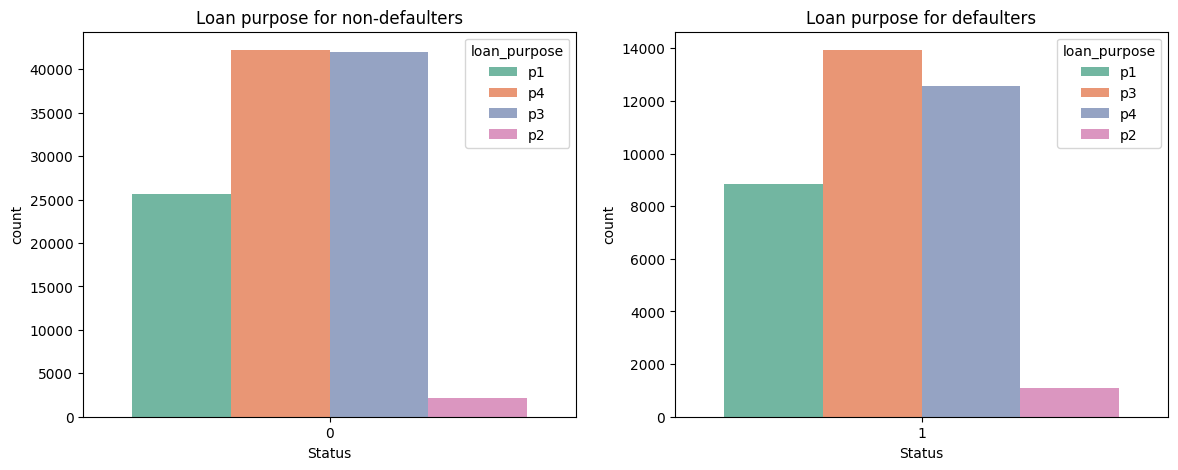

In [94]:
plt.figure(figsize= (14,5))
plt.subplot(1,2,1)
sns.countplot(x='Status',data = df_normal, hue='loan_purpose', palette='Set2')
plt.title('Loan purpose for non-defaulters')
plt.subplot(1,2,2)
sns.countplot(x='Status',data = df_defaulter, hue='loan_purpose', palette='Set2')
plt.title('Loan purpose for defaulters')
plt.show()

####p3 type loan is more availed by defaulters, followed by p4 loan type. In Non-Defaulters p4 and p3 are showing high.

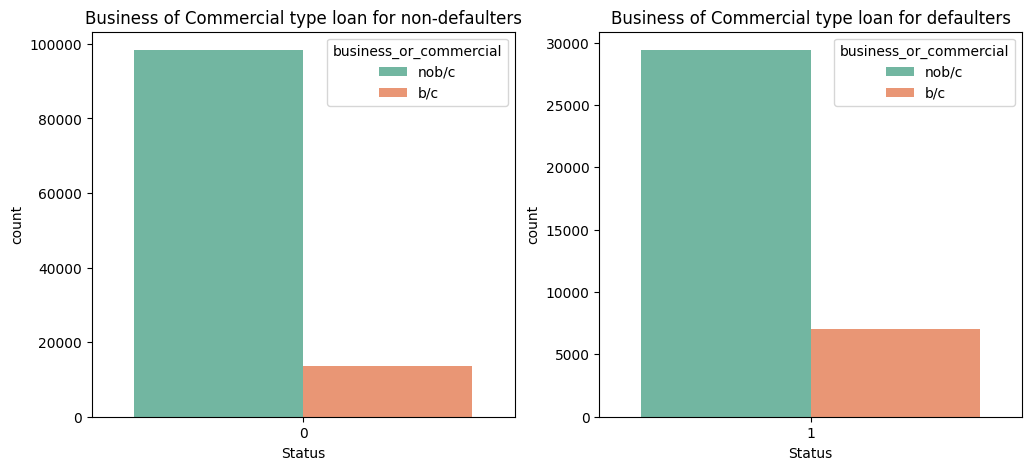

In [95]:
plt.figure(figsize= (12,5))
plt.subplot(1,2,1)
sns.countplot(x='Status',data = df_normal, hue='business_or_commercial', palette='Set2')
plt.title('Business of Commercial type loan for non-defaulters')
plt.subplot(1,2,2)
sns.countplot(x='Status',data = df_defaulter, hue='business_or_commercial', palette='Set2')
plt.title('Business of Commercial type loan for defaulters')
plt.show()

####Personal loan type is more in both Default and Non-Defaulter categories.

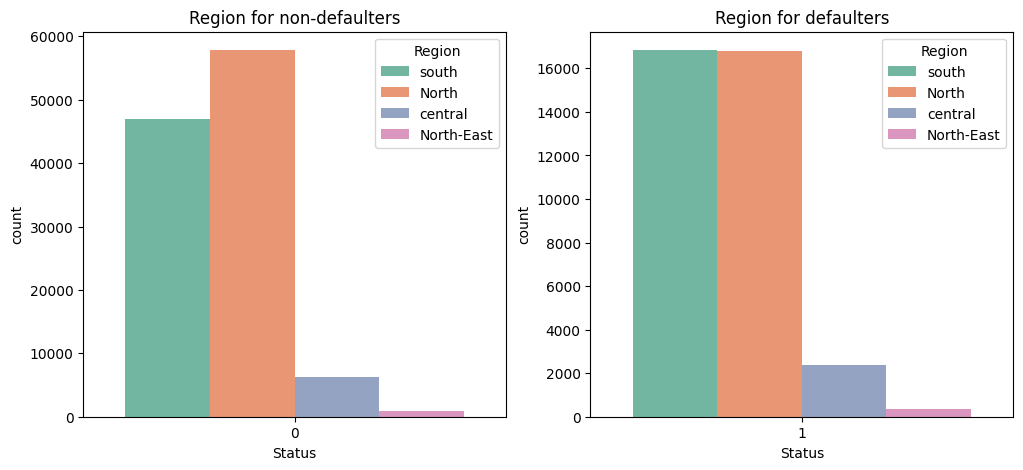

In [96]:
plt.figure(figsize= (12,5))
plt.subplot(1,2,1)
sns.countplot(x='Status',data = df_normal, hue='Region', palette='Set2')
plt.title('Region for non-defaulters')
plt.subplot(1,2,2)
sns.countplot(x='Status',data = df_defaulter, hue='Region', palette='Set2')
plt.title('Region for defaulters')
plt.show()

In [ ]:
bins = [300, 600, 700, 800, 850]
labels = ['Poor', 'Fair', 'Good', 'Excellent']
df['Credit_Score_Band'] = pd.cut(df['Credit_Score'], bins=bins, labels=labels, right=False)

In [ ]:
bins = [0, 3000, 6000, 10000, 20000]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
df['Income_Band'] = pd.cut(df['income'], bins=bins, labels=labels)

In [ ]:
bins = [100000, 200000, 500000, 1000000, 10000000]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
df['Loan_Amount_Band'] = pd.cut(df['loan_amount'], bins=bins, labels=labels, right=True)
print(df[['loan_amount', 'Loan_Amount_Band']].head())

   loan_amount Loan_Amount_Band
0       116500              Low
1       206500       Medium-Low
2       406500       Medium-Low
3       456500       Medium-Low
4       696500      Medium-High


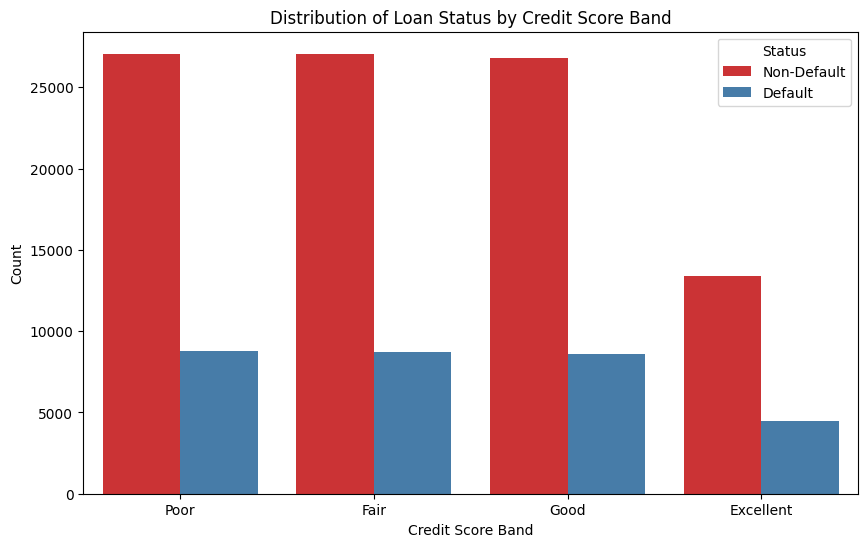

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Credit_Score_Band', hue='Status', palette='Set1')
plt.title('Distribution of Loan Status by Credit Score Band')
plt.xlabel('Credit Score Band')
plt.ylabel('Count')
plt.legend(title='Status', labels=['Non-Default', 'Default'])
plt.show()

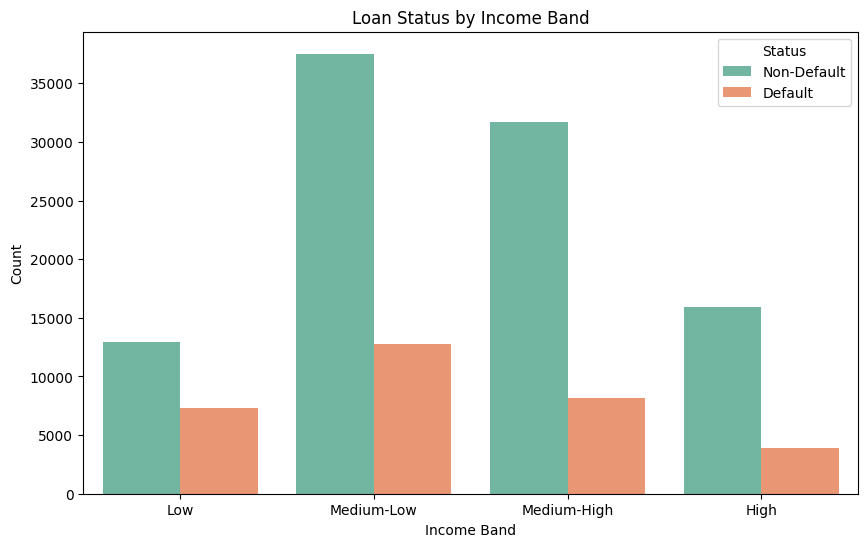

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Income_Band', hue='Status', palette='Set2')
plt.title('Loan Status by Income Band')
plt.xlabel('Income Band')
plt.ylabel('Count')
plt.legend(title='Status', labels=['Non-Default', 'Default'])
plt.show()

####Medium-Low category is tend to be more on Default Status. High income category is less chance to become default.

##Correlation

In [ ]:
numerical_cols = ['loan_amount', 'rate_of_interest', 'Upfront_charges', 'property_value',
                    'income', 'Credit_Score', 'LTV','Status']
numerical_data = df[numerical_cols]

In [ ]:
correlation_matrix = numerical_data.corr()

print(correlation_matrix)

                  loan_amount  rate_of_interest  Upfront_charges  \
loan_amount          1.000000          0.000301         0.066193   
rate_of_interest     0.000301          1.000000         0.395453   
Upfront_charges      0.066193          0.395453         1.000000   
property_value       0.677562          0.101525         0.091870   
income               0.416883          0.051646         0.065872   
Credit_Score         0.003978         -0.005073        -0.003840   
LTV                  0.194022         -0.156300        -0.088064   
Status              -0.035057         -0.962983        -0.431785   

                  property_value    income  Credit_Score       LTV    Status  
loan_amount             0.677562  0.416883      0.003978  0.194022 -0.035057  
rate_of_interest        0.101525  0.051646     -0.005073 -0.156300 -0.962983  
Upfront_charges         0.091870  0.065872     -0.003840 -0.088064 -0.431785  
property_value          1.000000  0.381429      0.001470 -0.216959 -0.1

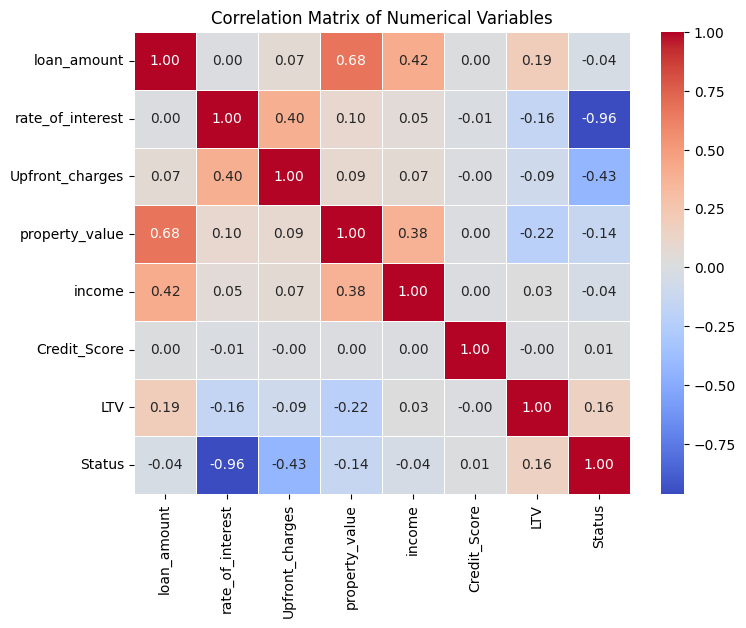

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

####From the correlation we can observe that


*   There is a strong positive correlation (0.68), indicating that as the loan amount increases, the property value also tends to increase.
*   A moderate positive correlation (0.38) suggests that individuals with higher incomes tend to have properties with higher values.
* The correlation of -0.96 indicates a very strong negative relationship, meaning that higher interest rates are associated with lower loan approval status. This could suggest that loans with higher interest rates may be riskier or less favorable for borrowers.
* The correlation of 0.42 indicates a moderate positive relationship, suggesting that individuals with higher incomes tend to take larger loans.
* There is a moderate positive correlation (0.16), indicating that higher LTV ratios may be linked to a greater likelihood of loan approval, although the relationship is not very strong.
* The LTV ratio shows some moderate correlations with income (0.03) and property value (0.22), suggesting that the proportion of the loan amount compared to the property value may have some effect on these factors.



##Hypothesis Testing

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Gender'], df['Status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}, p-value: {p}')

Chi-square statistic: 985.4806049948216, p-value: 2.5398597779768535e-213


The p value is coming less than alpha level of 0.05. This strongly suggests that there is a statistically significant association between Gender and Status.

In [ ]:
contingency_table = pd.crosstab(df['loan_type'], df['Status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}, p-value: {p}')

Chi-square statistic: 1201.3768588694704, p-value: 1.3314649959094227e-261


The p value is coming less than alpha level of 0.05. This strongly suggests that there is a statistically significant association between loan_type and Status.

In [ ]:
contingency_table = pd.crosstab(df['Region'], df['Status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}, p-value: {p}')

Chi-square statistic: 349.4226197650187, p-value: 1.9892774562000548e-75


###T-Test

In [ ]:
from scipy.stats import ttest_ind
approved_income = df[df['Status'] == 1]['income']
defaulted_income = df[df['Status'] == 0]['income']
t_stat, p_value = ttest_ind(approved_income, defaulted_income)
print(t_stat,p_value)

-16.34985316722211 4.9220379146458525e-60


 It suggests that the average loan amount for borrowers who defaulted is significantly different (likely higher) than that of borrowers who did not default.

In [ ]:
loan_amount_non_defaulters = df[df['Status'] == 0]['loan_amount']
loan_amount_defaulters = df[df['Status'] == 1]['loan_amount']
t_stat, p_val = ttest_ind(loan_amount_non_defaulters, loan_amount_defaulters)
print(t_stat,p_val)

13.595159000812286 4.534437111819678e-42


The analysis indicates that there is a significant difference in loan amounts between borrowers who default and those who do not.

In [ ]:
interest_rate_non_defaulters = df[df['Status'] == 0]['rate_of_interest']
interest_rate_defaulters = df[df['Status'] == 1]['rate_of_interest']
t_stat, p_val = ttest_ind(interest_rate_non_defaulters, interest_rate_defaulters)
print(t_stat,p_val)

18.644642654172802 1.7125791721720202e-77


The analysis indicates a significant relationship between the rate of interest and loan default status

##Insights
* Medium-Low Income band peoples are having more number of defaulters.
* Higher loan amount is having more number of defaulters.
* Male clients are having more number of defaulters.
* South and North Region peoples are higher number of defaulters
* Compared to Business loans people are getting more number of Personal loans.
* P3 type of loans are more number of defaulters.
